<h1>Stars of mitigation? Participation-based structures and performance in a city-to-business network </h1>
<h2> Milja Heikkinen, Onerva Korhonen, Sirkku Juhola, & Tuomas Ylä-Anttila, 2021</h2>

In the related article, we investigate Climate Partners (CP), a city-to-business network coordinated by the city of Helsinki, as a case example of the role of city-to-business networks in climate change mitigation. We study the performance of the CP in terms of bipartite graph analysis as well as with a quantitative performance index. This frontend notebook walks the reader through the bipartite graph analysis. For any details of the methodology, please see the Materials and Methods section of the article.

The easiest way to run the notebook is via Binder. Nevertheless, if you want to run it in your local environment, the versions used are Python 2.7, Numpy 1.14.0, NetworkX 2.1, Scipy 1.0.0, and Matplotlib 2.1.2.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/onerva-korhonen/climate-companions-bipartite/HEAD)

<b>NOTE:</b> For privacy reasons, we are unfortunately not allowed to share the original Climate Partners event and participant data publicly. Therefore, <b> the data used for running this notebook is simulated </b>, although it approximately matches the properties of the original CP data. Because of this, the results produced by running this notebook differ from those reported in the article. 

In case of questions about the article or the original data, please contact Milja Heikkinen (milja.e.heikkinen@helsinki.fi). In case of questions about the code, please contact Onerva Korhonen (onerva.korhonen@gmail.com).

Let's start by some imports. <code>parameters</code> is a storage file for all parameters used in the analysis. <code>functions</code> contains all functions used to run the analysis. In this frontend notebook, <code>numpy</code> is used for minor operations, for example calculating averages. All remaining imports are done inside the <code>functions</code> file.

In [1]:
import parameters as pms
import functions

import numpy as np

Parameters are passed to analysis functions inside a dictionary called <code>cfg</code>, defined in the following block. For details on the different parameters, see the documentation in <code>functions</code>.

In the CP bipartite graphs, top nodes represent event participants, bottom nodes correspond to events, and links connect participants to those events they participated in. The data needed for constructing the network is stored in three <code>.csv</code> files: the company input file located at <code>cfg['companyInputPath']</code> contains information about the participants, including their name, alias, membership class, and field of business, the event input file located at <code>cfg['eventInputPath']</code> contains information about the events, and the link input file at <code>cfg['linkInputPath']</code> contains the participant - event pairs. These paths can be specified in the <code>params</code> file or given directly in the frontend script.

In the article, we use four two-year time windows: 2011-2012, 2013-2014, 2015-2016, and 2017-2018. Further, we analysed also the whole period 2011-2018 as a single eight-year window. In this case, the company and event input files contained information about all participants and events and were thus used for all time windows, while the link input files were time window specific.

Therefore, most of the graph analysis of the article took place inside a for loop over time windows and corresponding link input files. In this frontend notebook, we will demonstrate the main analysis steps for a single time window.

TODO: fix the companyInputPath and eventInputPath and linkInputPath to point to the example data files (this should be done in this notebook and not in params).

In [2]:
cfg = {}

cfg['companyInputPath'] = pms.companyInputPath
cfg['eventInputPath'] = pms.eventInputPath
cfg['linkInputPath'] = pms.linkInputPaths[-1]
cfg['companyColumnNames'] = pms.companyColumnNames
cfg['eventColumnNames'] = pms.eventColumnNames
cfg['linkColumnNames'] = pms.linkColumnNames
cfg['tags'] = pms.tags
cfg['classes'] = pms.membershipClasses
cfg['csvSeparator'] = pms.csvSeparator
cfg['indexKey'] = pms.indexKey
cfg['degreeNormalizationKey'] = pms.degreeNormalizationKey
cfg['indexChangeKey'] = pms.indexChangeKey
cfg['maskKey'] = pms.maskKey
cfg['nodesToExcludeFromScatter'] = pms.nodesToExcludeFromScatter
    
cfg['ignoreNonMembers'] = pms.ignoreNonMembers
cfg['nonMemberClasses'] = pms.nonMemberClasses
    
cfg['nTopDegreeBins'] = pms.nTopDegreeBins
cfg['nBottomDegreeBins'] = pms.nBottomDegreeBins
cfg['cliqueHeatmapTopBins'] = pms.cliqueHeatmapTopBins
cfg['cliqueHeatmapBottomBins'] = pms.cliqueHeatmapBottomBins
cfg['nRichnessBins'] = pms.nRichnessBins
cfg['nIndexBins'] = pms.nIndexBins
    
cfg['separateClasses'] = pms.separateClasses
cfg['analyzeZeroDegreeFields'] = pms.analyzeZeroDegreeFields
cfg['normalizeDegreeInScatter'] = pms.normalizeDegreeInScatter
    
cfg['nRandomIterations'] = pms.nRandomIterations
cfg['nRandomBins'] = pms.nRandomBins
cfg['fieldMeanDegreesSigLimit'] = pms.fieldMeanDegreesSigLimit
    
cfg['topColor'] = pms.topColor
cfg['bottomColor'] = pms.bottomColor
cfg['classColors'] = pms.classColors
cfg['networkColors'] = pms.networkColors
cfg['nonUniqueColorTags'] = pms.nonUniqueColorTags
cfg['networkNonUniqueColor'] = pms.networkNonUniqueColor
cfg['networkBottomColor'] = pms.networkBottomColor
cfg['nodeSize'] = pms.nodeSize
cfg['nodeShapes'] = pms.nodeShapes
cfg['bottomShape'] = pms.bottomShape
cfg['edgeWidth'] = pms.edgeWidth
cfg['edgeAlpha'] = pms.edgeAlpha
cfg['cliqueTopColor'] = pms.cliqueTopColor
cfg['nonCliqueColor'] = pms.nonCliqueColor
cfg['nonCliqueAlpha'] = pms.nonCliqueAlpha
cfg['cliqueHeatmapCmap'] = pms.cliqueHeatmapCmap
cfg['cliqueHeatmapTopTicks'] = pms.cliqueHetamapTopTicks
cfg['cliqueHeatmapBottomTicks'] = pms.cliqueHeatmapBottomTicks
cfg['cliqueHeatmapTopLabels'] = pms.cliqueHeatmapTopLabels
cfg['cliqueHeatmapBottomLabels'] = pms.cliqueHeatmapBottomLabels
cfg['identityLineStyle'] = pms.identityLineStyle
cfg['scatterMarker'] = pms.scatterMarker
cfg['classMarkers'] = pms.classMarkers
cfg['markerAlpha'] = pms.markerAlpha
cfg['randomColor'] = pms.randomColor
cfg['randomMarker'] = pms.randomMarker
cfg['randomAlpha'] = pms.randomAlpha
cfg['dataColor'] = pms.dataColor
cfg['dataMarker'] = pms.dataMarker
cfg['dataLineWidth'] = pms.dataLineWidth
cfg['histWidth'] = pms.histWidth
cfg['fieldHistWidth'] = pms.fieldHistWidth
cfg['starnessXLims'] = pms.starnessXLims
cfg['starnessYLims'] = pms.starnessYLims
cfg['richnessXLims'] = pms.richnessXLims
cfg['richnessYLims'] = pms.richnessYLims
cfg['relativeDivXLims'] = pms.relativeDivXLims
cfg['relativeDivYLims'] = pms.relativeDivYLims
cfg['richnessLineStyle'] = pms.richnessLineStyle
cfg['diversityLineStyle'] = pms.diversityLineStyle
cfg['indexPercentile'] = pms.indexPercentile
cfg['indexPercentileLineStyle'] = pms.indexPercentileLineStyle
cfg['indexPercentileColor'] = pms.indexPercentileColor
cfg['indexPercentileAlpha'] = pms.indexPercentileAlpha
    
cfg['savePathBase'] = pms.savePathBase
cfg['degreeIndexScatterSaveName'] = pms.degreeIndexScatterSaveName + '_all_degree_normalized.pdf'
cfg['degreeIndexHeatmapSaveName'] = pms.degreeIndexHeatmapSaveName + '_all_degree_normalized.pdf'

In [3]:
# TODO: probably delete this block

#years = pms.years # this contains the time windows: 2011-2012, 2013-2014, 2015-2016, 2017-2018, and 2011-2018
#linkInputPaths = pms.linkInputPaths # for each window, there's a link file that contains the event-participant pairs

#topNodes = []
#topNodesWithoutNonmembers = [] # this is needed for calculating Jaccards without non-members

#densities = []
#nCliques = []
#starnesses = []
#meanRichnesses = []
#meanDiversities = []
#meanRelativeDiversities = []

We begin by calculating some basic properties of the CP bipartite graph. The results produced by the following block are reported in Table 2 of the article and discussed in detail in section 3.

In [4]:
nodesToExcludeFromDegrees = pms.nodesToExcludeFromDegrees # this is for excluding the instances of the city of Helsinki from the mean degree calculations

mclasses = list(cfg['classes']) # these are the membership classes listed in the parameters file
for nonMemberClass in cfg['nonMemberClasses']:
    mclasses.remove(nonMemberClass)
    
bnet = functions.createBipartite(cfg) # this creates the bipartite graph based on event participation in the present window
    
top,_ = functions.getTopAndBottom(bnet)
tlist = list(top)
nodeClasses = [bnet.nodes(data=True)[node]['class'] for node in tlist]
degrees = [bnet.degree(node) for node in tlist]
    
for mclass in mclasses:
    # counting the number of CP members that participate or did not participate in events
    # in case of multiple time windows, this loop can be tuned to count only participation inside the present window
    # for details, see frontend.py
    partCount = 0
    nonpartCount = 0
    for nodeClass,degree in zip(nodeClasses,degrees):
        if nodeClass == mclass:
            if degree > 0:
                partCount += 1
            else:
                nonpartCount += 1
        
    print 'In class ' + mclass + ' ' + str(partCount) + ' participants, ' + str(nonpartCount) + ' non-participants'
        
# counting the number of participants that were not CP members
partCount = 0
        
for nodeClass,degree in zip(nodeClasses,degrees):
    if nodeClass in cfg['nonMemberClasses'] and degree > 0:
        partCount += 1
        
nonMemberStr = ', '.join(cfg['nonMemberClasses'])
print 'In classes ' + nonMemberStr + ' ' + str(partCount) + ' participants'
                
# calculating the graph density with and without nonmember participants
            
degreeDict = functions.getDegreeNodeDictionary(bnet,cfg)
bnet, nZeroDegree = functions.pruneBipartite(bnet) # this removes from the graph all nodes that have degree 0
        
density = functions.getDensity(bnet)
densityWithoutNonMembers = functions.getDensity(bnet,excludeNonMembers=True,nonMemberClasses=cfg['nonMemberClasses'])
print 'Density: ' + str(density) + ', ' + str(densityWithoutNonMembers) + ' excluding non-members'
     
top,bottom = functions.getTopAndBottom(bnet)
        
# calculating the number of events and participants/event and events/participant
        
print str(len(bottom)) + ' events organized'
        
cnet = bnet.copy() # calculating the events/participant and participants/event requires excluding some nodes, so let's use a copy of the network
for node in top:
    if node in nodesToExcludeFromDegrees: # first removing only the nodes particularly listed for being removed (in our case, the instances of the city of Helsinki that participate in all events and articially increase the mean participants/event)
        cnet.remove_node(node)
        
ctop, cbottom = functions.getTopAndBottom(cnet)
bottomDegrees = [cnet.degree(node) for node in cbottom]
print 'On average ' + str(np.mean(bottomDegrees)) + ' participants per event, min ' + str(min(bottomDegrees)) + ', max ' + str(max(bottomDegrees))
        
for node in ctop:
    if cnet.nodes(data=True)[node]['class'] in cfg['nonMemberClasses']: # now, removing all non-member nodes (that often participate only one event, thus artificially lowering mean events/participant)
        cnet.remove_node(node)
        
ctop,_ = functions.getTopAndBottom(cnet)
topDegrees = [cnet.degree(node) for node in ctop]
print 'On average ' + str(np.mean(topDegrees)) + ' events per participant, min ' + str(min(topDegrees)) + ', max ' + str(max(topDegrees))

In class BM 69 participants, 6 non-participants
In class OM 17 participants, 1 non-participants
In class HKI 2 participants, 0 non-participants
In classes NM 117 participants
Density: 0.148509485095, 0.260732323232 excluding non-members
18 events organized
On average 28.61111111111111 participants per event, min 9, max 57
On average 4.4186046511627906 events per participant, min 1, max 14


In [5]:
# TODO: the Jaccard code used to be here but I deleted it; do we need it here?

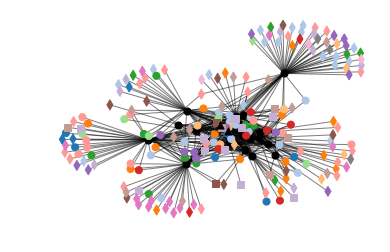

In [6]:
functions.drawNetwork(bnet,cfg)